# <font color='DarkCyan'> VERX - FASE TESTE </font>

### Joziani Mota Viera

### 28/07/2022

## Modulos de Funções

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('dark')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
#import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import calibration
from sklearn import metrics
import pickle
    
    
def medidas(mod, predict_test_prob):
    predict_test_class = mod.predict(X_teste)
    matrix_conf = metrics.confusion_matrix(Y_teste, predict_test_class, labels = [1, 0])
    #Acuracia
    Acuracia = round(metrics.accuracy_score(Y_teste, predict_test_class),3)
    #Sensibilidade/ — TP/(TP + FN)
    Sensibilidade = round(matrix_conf[1,1]/(matrix_conf[1,1]+matrix_conf[1,0]),3)
    #Especificidade — TN/(TN + FP)
    Especificidade = round(matrix_conf[0,0]/(matrix_conf[0,0]+matrix_conf[0,1]),3)
    AUC = round(metrics.roc_auc_score(Y_teste, predict_test_prob),3)
    
    return(Acuracia,Sensibilidade,Especificidade, AUC)

## Lendo dados

In [2]:
df = pd.read_csv('creditcard.csv',encoding = "latin-1")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.columns[df.isna().any()]

Index([], dtype='object')

## Análises Descritivas

284315 (99.83%)
492 (0.17%)


c:\Users\jozia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


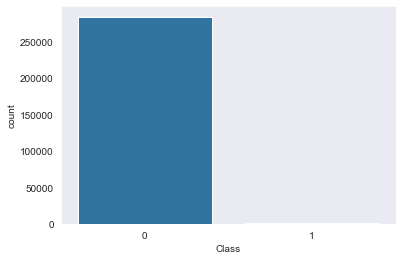

In [5]:
num_Nfraudes = len(df[df['Class'] == 0])
num_fraudes = len(df[df['Class'] == 1])
print('{0} ({1:2.2f}%)'.format(num_Nfraudes, (num_Nfraudes/ (num_Nfraudes + num_fraudes)) * 100))
print('{0} ({1:2.2f}%)'.format(num_fraudes, (num_fraudes/ (num_Nfraudes + num_fraudes)) * 100))
sns.countplot('Class', data=df);

In [6]:
#df.drop(columns=['Class']).describe()
df[['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


## Correlação

In [7]:
import dataframe_image as dfi
corr = df.corr()
plot_corr = corr.style.background_gradient(cmap='coolwarm').set_precision(2).set_properties(**{'max-width': '50px', 'font-size': '9pt'})
plot_corr.export_png("graficos/plot_corr.png",
                max_rows=40,
                max_cols=40)

C:\Users\jozia\AppData\Local\Temp/ipykernel_90232/600392110.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  plot_corr = corr.style.background_gradient(cmap='coolwarm').set_precision(2).set_properties(**{'max-width': '50px', 'font-size': '9pt'})


In [8]:
#pd.plotting.scatter_matrix(df, diagonal='kde', figsize = (20, 20))

## Método Holdout

In [9]:
# Criando objetos
X = df.drop(columns=['Class']).values

Y = df.Class.values

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.30, random_state = 123)
X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape

((199364, 30), (85443, 30), (199364,), (85443,))

## Dados  desbalanceados - Técnica under-sampling

0    332
1    332
dtype: int64


c:\Users\jozia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

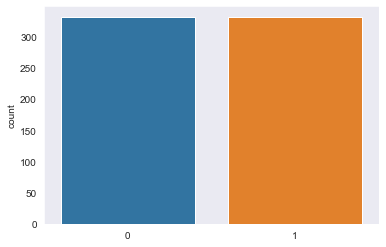

In [10]:
undersample  = RandomUnderSampler()
X_under, Y_under = undersample.fit_resample(X_treino, Y_treino)
# ver o balanceamento das classes
print(pd.Series(Y_under).value_counts())
# plotar a nova distribuição de classes
sns.countplot(Y_under)

## Regressão Logística

In [11]:
mod_reg = LogisticRegression(max_iter = 1000)
mod_reg = mod_reg.fit(X_treino, Y_treino)

predict_reg_prob = mod_reg.predict_proba(X_teste)
predict_reg_prob = predict_reg_prob[:, 1]

medidas_reg = np.array(medidas(mod_reg, predict_reg_prob))

print(np.exp(mod_reg.coef_))

[[0.99994078 1.56149808 0.69068934 0.30909171 1.20700787 0.88395708
  0.93843987 2.60292945 0.62708826 0.56187339 0.70270311 0.56576606
  1.16226689 0.59518225 0.45392715 0.40318691 0.65869332 0.58390601
  1.14255913 0.99643277 1.1584381  1.83786343 1.94468732 1.00516425
  0.96180898 0.42177448 1.14500873 0.86615331 1.0776781  0.9941014 ]]


In [12]:
mod_reg_under = mod_reg.fit(X_under, Y_under)

predict_reg_prob_under = mod_reg_under.predict_proba(X_teste)
predict_reg_prob_under = predict_reg_prob_under[:, 1]

medidas_reg_under = np.array(medidas(mod_reg_under, predict_reg_prob_under))

print(np.exp(mod_reg_under.coef_))

[[0.99998222 0.70489076 1.31043722 0.60009013 1.3958937  0.81354591
  0.90774992 0.65702196 1.02846734 0.83259678 0.6697133  1.32075906
  0.63879985 0.98537631 0.59922064 0.98948159 0.73791381 0.61499434
  0.85431956 1.05117175 1.02322865 1.06469644 1.00198757 0.99518856
  0.99100876 1.00271789 1.00298488 1.01293181 1.0094641  0.99962517]]


## Random Forest

In [13]:
mod_rf = RandomForestClassifier(random_state = 123)
mod_rf = mod_rf.fit(X_treino, Y_treino.ravel())

predict_rf_prob = mod_rf.predict_proba(X_teste)
predict_rf_prob = predict_rf_prob[:, 1]

medidas_rf = np.array(medidas(mod_rf, predict_rf_prob))

In [14]:
mod_rf_under = mod_rf.fit(X_under, Y_under.ravel())

predict_rf_prob_under = mod_rf_under.predict_proba(X_teste)
predict_rf_prob_under = predict_rf_prob_under[:, 1]

medidas_rf_under = np.array(medidas(mod_rf_under, predict_rf_prob_under))

# Support Vector Machines

In [15]:
mod_svm = svm.SVC(kernel='linear')
mod_svm = mod_svm.fit(X_treino, Y_treino.ravel())

predict_svm_prob = mod_svm.decision_function(X_teste)
medidas_svm = np.array(medidas(mod_svm, predict_svm_prob))

In [16]:
mod_svm_under = mod_svm.fit(X_under, Y_under.ravel())

predict_svm_prob_under = mod_svm_under.decision_function(X_teste)
medidas_svm_under = np.array(medidas(mod_svm_under, predict_svm_prob_under))

# Medidas

In [22]:
pd.DataFrame({'Regressão Logística' : medidas_reg,
              'Regressão - Under-sampling' : medidas_reg_under,
              'RandomForest': medidas_rf,
              'RandomForest - Under-sampling': medidas_rf_under,
              'SVM' : medidas_svm,
              'SVM - Under-sampling' : medidas_svm_under},
             index = ['Acurácia', 'Sensibilidade', 'Especificidade', 'AUC'])

,Regressão Logística,Regressão - Under-sampling,RandomForest,RandomForest - Under-sampling,SVM,SVM - Under-sampling
Acurácia,0.999,0.960,1.000,0.967,0.998,0.996
Sensibilidade,1.000,0.960,1.000,0.967,1.000,0.996
Especificidade,0.612,0.894,0.806,0.919,0.356,0.794
AUC,0.952,0.967,0.955,0.976,0.788,0.963


## Curva ROC

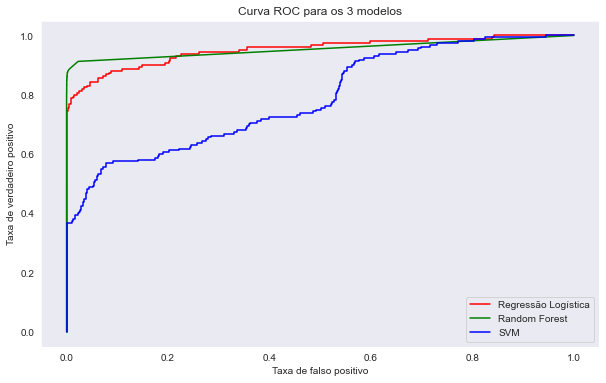

In [18]:
    plt.figure(figsize = (10,6))
    fpr_reg, tpr_reg, limite1 = metrics.roc_curve(Y_teste, predict_reg_prob)
    fpr_rf, tpr_rf, limite2 = metrics.roc_curve(Y_teste, predict_rf_prob)
    fpr_svm, tpr_svm, limite2 = metrics.roc_curve(Y_teste, predict_svm_prob)
    plt.plot(fpr_reg, tpr_reg, color='red', label='Regressão Logística')
    plt.plot(fpr_rf, tpr_rf, color='green', label='Random Forest')
    plt.plot(fpr_svm, tpr_svm, color='blue', label='SVM')
    plt.xlabel('Taxa de falso positivo')
    plt.ylabel('Taxa de verdadeiro positivo')
    plt.title('Curva ROC para os 3 modelos')
    plt.legend()
    plt.show()

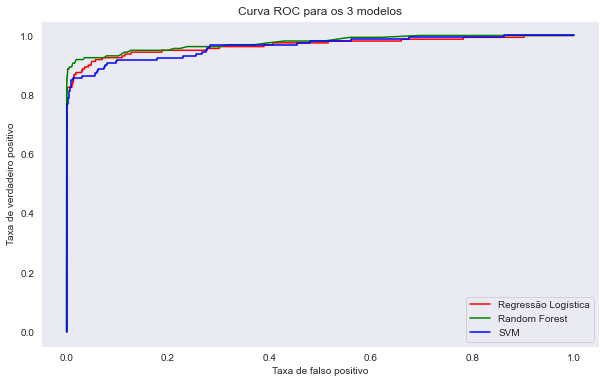

In [19]:
    plt.figure(figsize = (10,6))
    fpr_reg, tpr_reg, limite1 = metrics.roc_curve(Y_teste, predict_reg_prob_under)
    fpr_rf, tpr_rf, limite2 = metrics.roc_curve(Y_teste, predict_rf_prob_under)
    fpr_svm, tpr_svm, limite2 = metrics.roc_curve(Y_teste, predict_svm_prob_under)
    plt.plot(fpr_reg, tpr_reg, color='red', label='Regressão Logística')
    plt.plot(fpr_rf, tpr_rf, color='green', label='Random Forest')
    plt.plot(fpr_svm, tpr_svm, color='blue', label='SVM')
    plt.xlabel('Taxa de falso positivo')
    plt.ylabel('Taxa de verdadeiro positivo')
    plt.title('Curva ROC para os 3 modelos')
    plt.legend()
    plt.show()

### Salvando o modelo

In [23]:
filename = 'Regressão Logística - Under-sampling.sav'
pickle.dump(mod_reg_under, open(filename, 'wb'))

In [24]:
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[15].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[18].reshape(1, -1))
print(resultado1)
print(resultado2)

[0]
[0]


In [25]:
print(Y_teste[15])
print(Y_teste[18])

0
0


# Fim